# Campus-Placement-Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## Steps
 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model 

In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Text(0.5, 1.0, 'CGPA vs IQ with Placement Status')

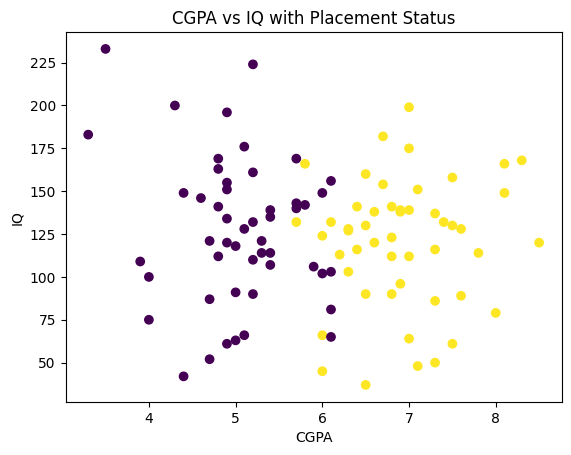

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ with Placement Status')

In [9]:
# Extract input and output cols
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [11]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [12]:
# Train test Split
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [14]:
x_train

,cgpa,iq
4,5.8,142.0
73,4.9,61.0
77,7.3,50.0
32,7.0,139.0
18,4.0,100.0
...,...,...
13,6.4,116.0
62,6.0,102.0
5,7.1,48.0
9,5.1,66.0


In [15]:
x_test

,cgpa,iq
51,4.8,141.0
27,6.0,124.0
70,6.3,127.0
91,7.5,158.0
24,4.7,121.0
14,6.1,103.0
66,6.9,96.0
76,4.9,155.0
23,4.7,87.0
25,5.0,91.0


In [16]:
y_train

4     0
73    0
77    1
32    1
18    0
     ..
13    1
62    0
5     1
9     0
64    1
Name: placement, Length: 90, dtype: int64

In [17]:
y_test

51    0
27    1
70    1
91    1
24    0
14    0
66    1
76    0
23    0
25    0
Name: placement, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Scale the values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [23]:
x_train

array([[-0.19498796,  0.43953953],
       [-0.97687038, -1.53230243],
       [ 1.10814941, -1.80008344],
       [ 0.84752193,  0.36650835],
       [-1.75875281, -0.58289704],
       [-0.71624291,  0.90207036],
       [-0.54249126, -0.24208485],
       [-0.28186379,  0.19610225],
       [-1.06374621,  1.09682019],
       [ 0.41314281,  0.87772663],
       [ 0.06563951,  0.78035172],
       [-0.80311873,  1.26722628],
       [ 0.67377028, -0.0229913 ],
       [-0.62936709, -0.07167875],
       [ 0.06563951, -1.43492752],
       [-1.23749786,  0.53691444],
       [ 0.76064611,  0.34216462],
       [-0.28186379,  0.46388326],
       [ 1.80315601,  1.023789  ],
       [-0.80311873,  0.09872734],
       [ 0.58689446,  0.73166427],
       [ 0.50001864,  0.34216462],
       [ 0.67377028, -0.29077231],
       [ 0.41314281, -2.1165519 ],
       [-1.49812533,  1.85147575],
       [ 0.50001864, -0.09602248],
       [ 0.93439776,  0.65863308],
       [ 0.76064611,  0.36650835],
       [ 0.23939116,

In [24]:
x_test = scaler.transform(x_test)

In [25]:
x_test

array([[-1.06374621,  0.4151958 ],
       [-0.02123631,  0.00135243],
       [ 0.23939116,  0.07438361],
       [ 1.28190106,  0.82903918],
       [-1.15062203, -0.07167875],
       [ 0.06563951, -0.50986586],
       [ 0.76064611, -0.68027195],
       [-0.97687038,  0.75600799],
       [-1.15062203, -0.8993655 ],
       [-0.88999456, -0.80199059]])

In [32]:
# Train the model
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred= clf.predict(x_test)

In [30]:
y_test

51    0
27    1
70    1
91    1
24    0
14    0
66    1
76    0
23    0
25    0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9

<Axes: >

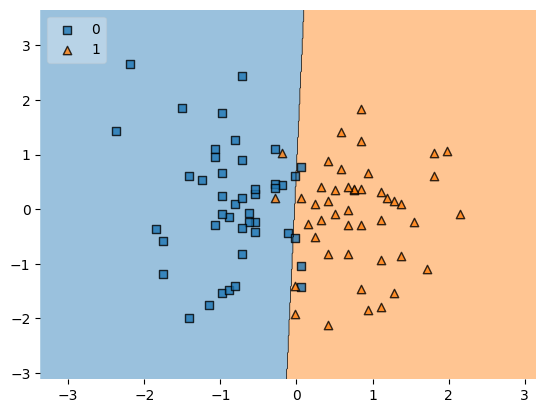

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))